In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import iminuit 
from iminuit import Minuit, cost
import ROOT

import mplhep as hep
mpl.style.use(hep.style.ATLAS)

In [2]:
V, μ_I, σ_I = np.loadtxt('lamp.txt', unpack=True)

In [22]:
def f(V, α, γ):
    return α*V**((4*γ-1)/(4*γ+1))

fcn = cost.LeastSquares(V, μ_I, σ_I, model=f)

In [23]:
m1 = Minuit(fcn, α=1/2, γ=1/5)

In [24]:
m1.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.791e+04 (chi2/ndof = 182.7)│              Nfcn = 126              │
│ EDM = 1.98e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ α    │11.9805e-3 │ 0.0027e-3 │            │            │         │         │       │
│ 1 │ γ    │ 877.69e-3 │  0.24e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────┐
│   │         α         γ │
├───┼─────────────────────┤
│ α │  7.22e-12 -6.12e-10 │
│ γ │ -6.12e-10  5.68e-08 │
└───┴─────────────────────┘

$$ I = \alpha\cdot V^{\frac{4\gamma-1}{4\gamma+1}} $$

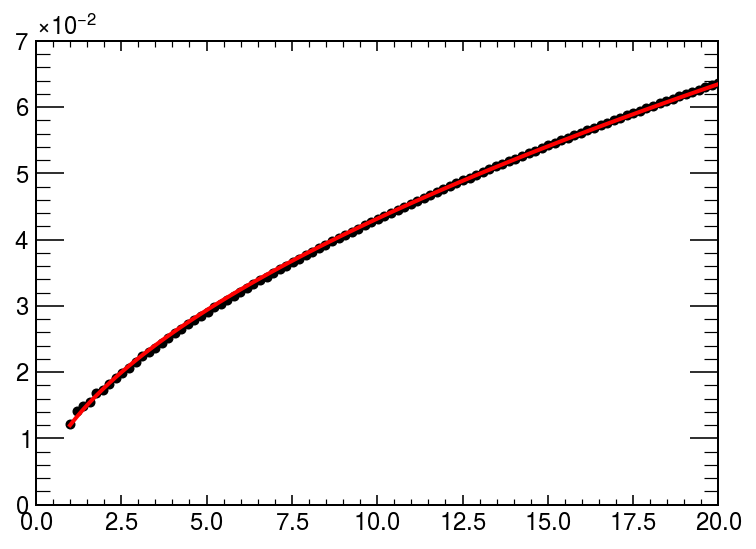

In [27]:
plt.errorbar(V, μ_I, σ_I, fmt='k.')
plt.plot(V, f(V, *m1.values), 'r', zorder=100)

In [28]:
m1.values['γ']

0.8776874742864311